Importing The Dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importing the Bigbasket dataset

In [14]:
df=pd.read_csv('/content/BigBasket Products.csv')

In [15]:
#Stastical measures of the dataset
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [16]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [17]:
# Checking the Missing values in the dataset
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [18]:
#Filling the Missing Values
mode=df['product'].mode()
mode

0    Turmeric Powder/Arisina Pudi
dtype: object

In [19]:
def fill_NAN_product_mode(df,variable,mode):
  df[variable]=df[variable].fillna(str(mode))
fill_NAN_product_mode(df,'product',mode)

In [20]:
mode=df['brand'].mode()
mode

0    Fresho
dtype: object

In [21]:
def fill_NAN_brand_mode(df,variable,mode):
  df[variable]=df[variable].fillna(str(mode))
fill_NAN_brand_mode(df,'brand',mode)

In [23]:
median=df['rating'].median()
median

4.1

In [24]:
def fill_NAN_rating_median(df,variable,median):
  df[variable]=df[variable].fillna(median)
fill_NAN_rating_median(df,'rating',median)

In [26]:
mode=df['description'].mode()
mode

0    A brand inspired by the Greek goddess of victo...
dtype: object

In [28]:
def fill_NAN_description_mode(df,variable,mode):
  df[variable]=df[variable].fillna(str(mode))
fill_NAN_description_mode(df,'description',mode)

In [30]:
#Checking the missing values in the data set
df.isna().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [31]:
#top 5  Values in the dataset
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [32]:
# bottom 5 values in the dataset 
df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


Visualization of data

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 13 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 13 missing from current font.



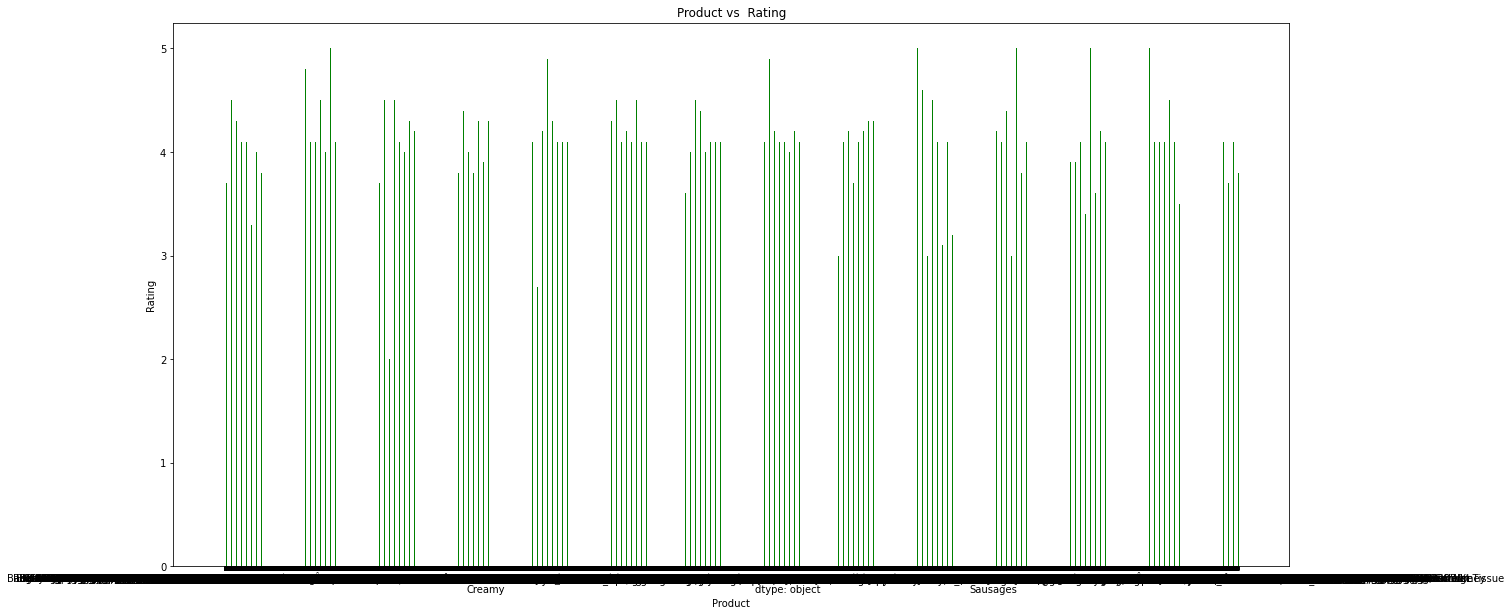

In [41]:
fig = plt.figure(figsize=(20,10))
plt.bar(df['product'],df['rating'],color='Green',width=0.1)
plt.xlabel('Product')
plt.ylabel('Rating')
plt.title('Product vs  Rating')
plt.show()

In [39]:
counts = df['category'].value_counts()
counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values})

In [40]:
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='greens',
 text_auto=True,
 title=f'Count of Items in Each Category')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



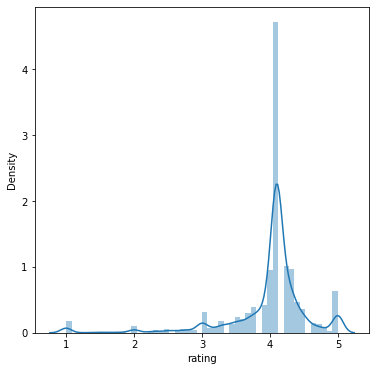

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(df['rating'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



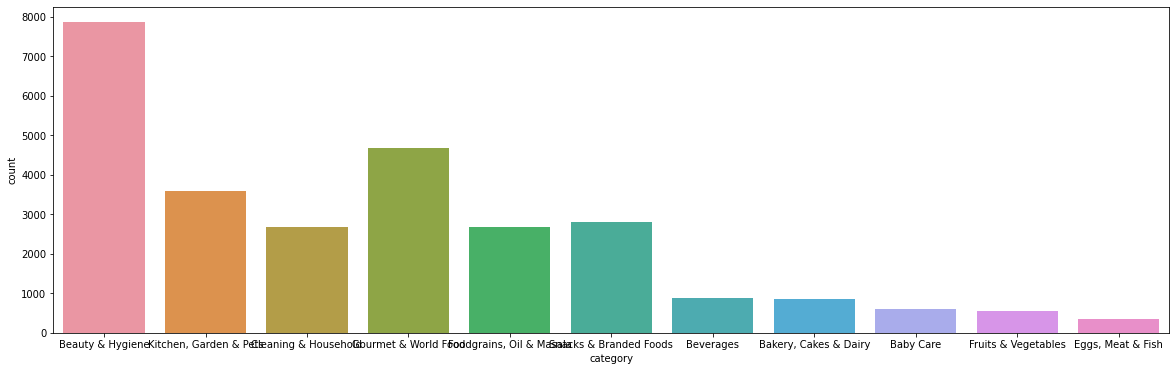

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(df['category'])
plt.show()